<a href="https://colab.research.google.com/github/willyanmarllon99/willyanmarllon99/blob/main/projeto_numero_1_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2023-06-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - Número de id gerado para identificar os imoveis
* name - Nome da propriedade
* host_id - Número do id do proprietário
* host_name - Nome do proprietário
* neighbourhood_group - Está variável não contem dados úteis
* neighbourhood - Nomes dos bairros
* latitude - Informa a coordenada da latitude do imóvel
*	longitude - Informa a coordenada da longitude do imóvel
* room_type - Tipo de quarto
*	price	- Preço para alugar o imovel
* minimum_nights - Quantidade mínima de noites para reservar
* number_of_reviews	- Número de reviews que a propriedade possui
* last_review	- Data do último review
* reviews_per_month - Quantidade de reviews por mês
* calculated_host_listings_count - Quantidade de imóveis do mesmo proprietário
* availability_365 - Número de dias de disponibilidade dentro de 365 dias
*	number_of_reviews_ltm - Número de reviwes
*	license - Licenças


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [11]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28,0.07,6,358,0,NaN
1,181189,Bed and breakfast in Rome · ★4.72 · 1 bedroom ...,868477,Luigi,NaN,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05,1.03,8,175,6,NaN
2,11834,Rental unit in Rome · ★4.80 · 1 bedroom · 1 be...,44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02,1.30,1,246,44,NaN
3,49240,Condo in Rome · ★4.69 · 2 bedrooms · 5 beds · ...,224479,Ermanno,NaN,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11,0.46,2,151,32,NaN
4,181747,Rental unit in Rome · ★4.56 · 2 bedrooms · 3 b...,871063,Lorenzo,NaN,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09,0.63,2,329,42,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [12]:
# identificar o volume de dados do DataFrame
df.shape
# verificar as 5 primeiras entradas do dataset
df.iloc[:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28,0.07,6,358,0,NaN
1,181189,Bed and breakfast in Rome · ★4.72 · 1 bedroom ...,868477,Luigi,NaN,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05,1.03,8,175,6,NaN
2,11834,Rental unit in Rome · ★4.80 · 1 bedroom · 1 be...,44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02,1.30,1,246,44,NaN
3,49240,Condo in Rome · ★4.69 · 2 bedrooms · 5 beds · ...,224479,Ermanno,NaN,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11,0.46,2,151,32,NaN
4,181747,Rental unit in Rome · ★4.56 · 2 bedrooms · 3 b...,871063,Lorenzo,NaN,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09,0.63,2,329,42,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.839732
reviews_per_month                 0.131665
last_review                       0.131665
host_name                         0.000076
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

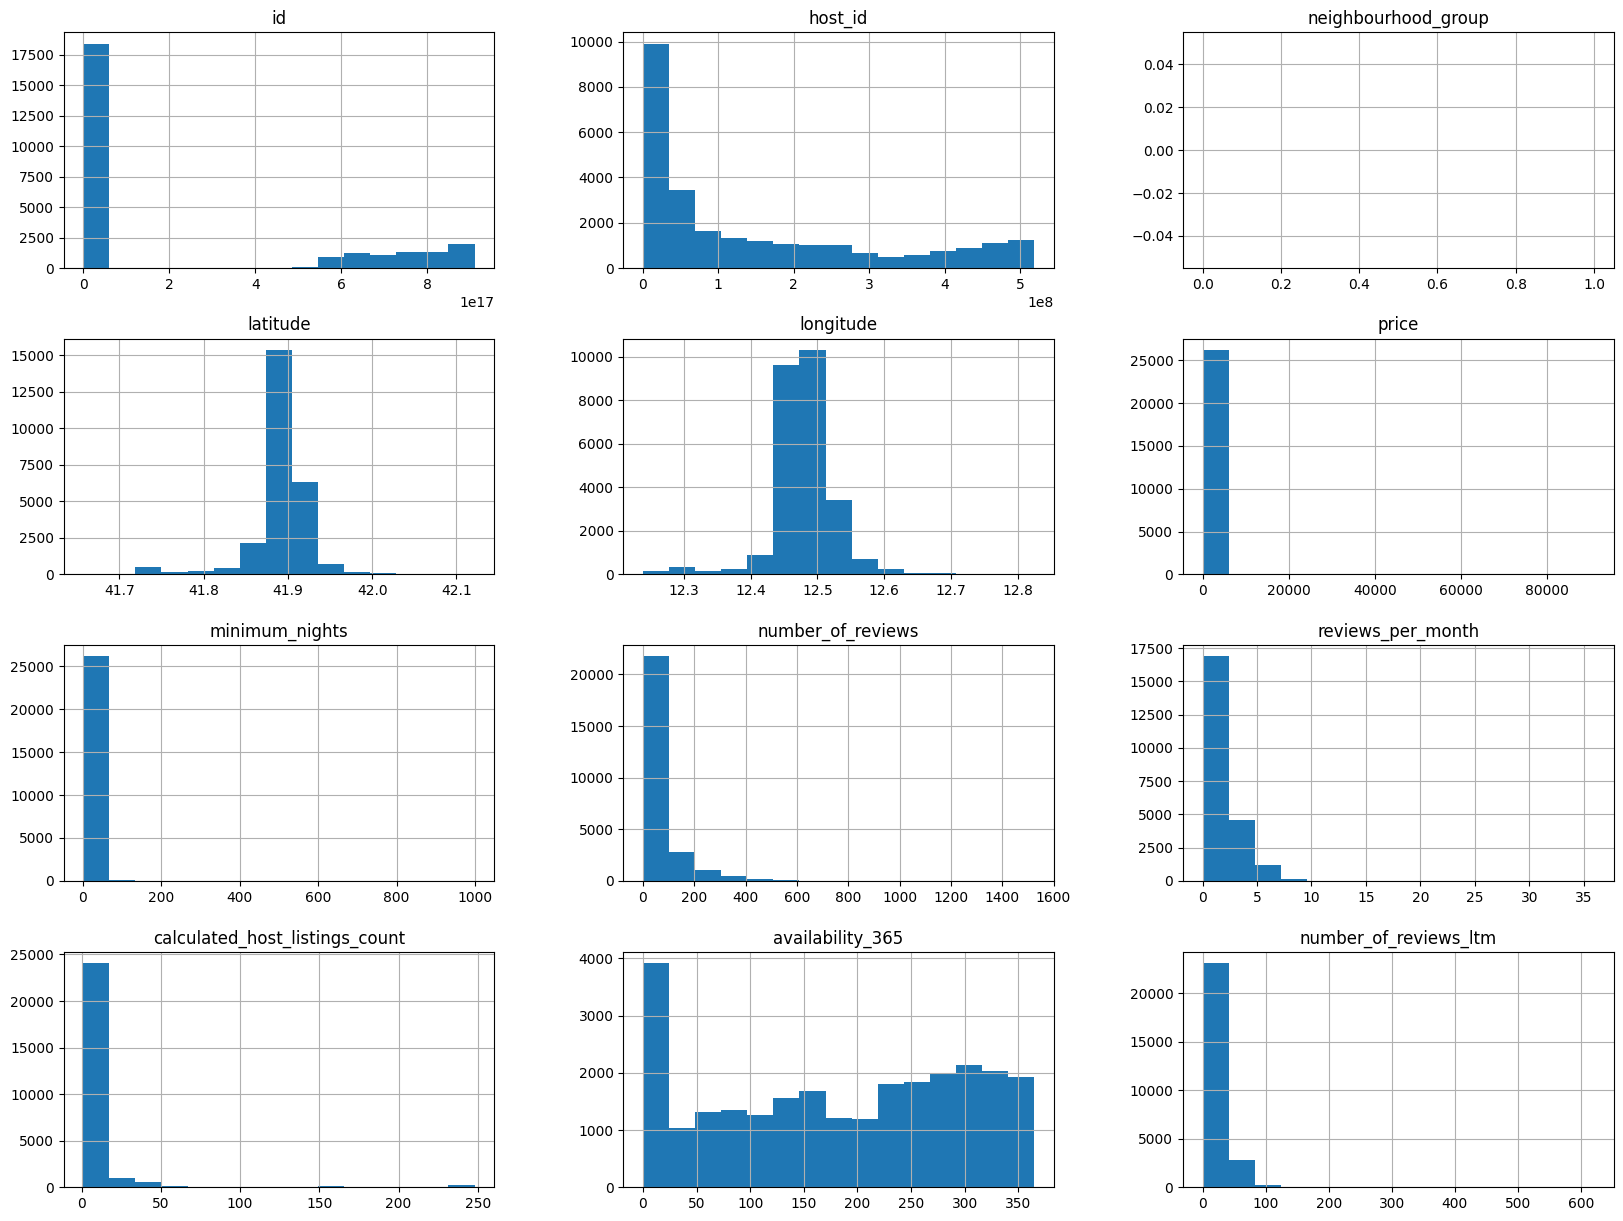

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15));

### **Q4. Qual a média dos preços de aluguel?**

In [19]:
# ver a média da coluna `price``
df.price.mean()

230.82834399756246

### **Q4. Qual a correlação existente entre as variáveis**

In [24]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights',	'number_of_reviews', 'reviews_per_month',	'calculated_host_listings_count',	'availability_365',	'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.026148,-0.023984,-0.025333,0.016702,0.002713,-0.029137
minimum_nights,0.026148,1.000000,-0.023216,-0.049993,-0.019672,-0.007162,-0.053489
number_of_reviews,-0.023984,-0.023216,1.000000,0.449956,-0.034130,-0.023129,0.692204
reviews_per_month,-0.025333,-0.049993,0.449956,1.000000,-0.009533,0.089881,0.689445
calculated_host_listings_count,0.016702,-0.019672,-0.034130,-0.009533,1.000000,-0.059793,-0.006657
availability_365,0.002713,-0.007162,-0.023129,0.089881,-0.059793,1.000000,0.056705
number_of_reviews_ltm,-0.029137,-0.053489,0.692204,0.689445,-0.006657,0.056705,1.000000


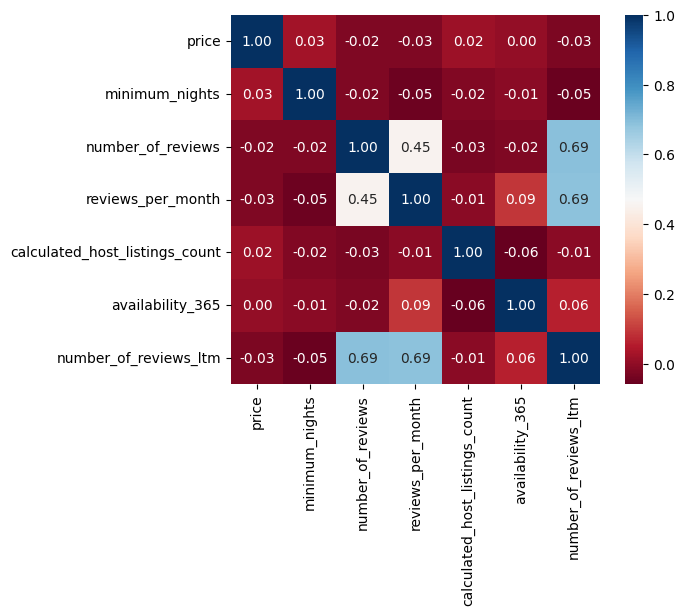

In [25]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    18299
Private room        7166
Hotel room           658
Shared room          133
Name: room_type, dtype: int64

In [30]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    69.694546
Private room       27.292809
Hotel room          2.506094
Shared room         0.506551
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [35]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
XI Arvalia/Portuense          491.759140
I Centro Storico              273.332916
VIII Appia Antica             253.616622
IX Eur                        243.570997
II Parioli/Nomentano          193.069831
XIII Aurelia                  191.487682
VII San Giovanni/Cinecittà    160.984383
V Prenestino/Centocelle       148.383642
XIV Monte Mario               146.778846
XV Cassia/Flaminia            142.946188
Name: price, dtype: float64

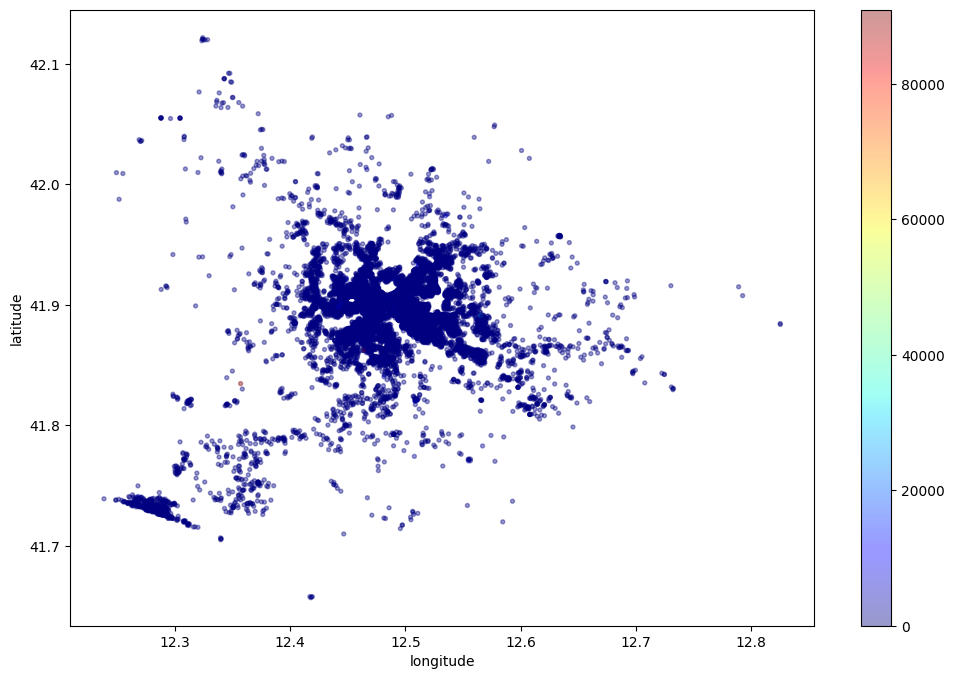

In [37]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [38]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.455629189518586

## Conclusões


Concluo que foi feita uma pequena análise dos dados, porém se percebe que a há poucos quartos compartilhados disponíveis, em relaçao a casa inteira/apt.